## *SIGNAL DECAY ANALYSIS* 

In [1]:
import pandas as pd
df = pd.read_csv('allsignal_20.csv.gz', compression = 'gzip')

In [2]:
df

,permno,yyyymm,XFIN,TrendFactor,NetEquityFinance,TotalAccruals,grcapx,RDS,MomOffSeason06YrPlus,roaq,...,InvestPPEInv,hire,DelDRC,retConglomerate,CustomerMomentum,MomSeason16YrPlus,IndMom,betaVIX,IntanEP,DelLTI
0,10001,199901,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.027581,-0.016140,...,-0.003704,0.158491,NaN,-0.009186,NaN,NaN,0.102473,0.000048,0.099803,0.001519
1,10001,199902,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.022359,-0.016140,...,-0.003704,0.158491,NaN,-0.047183,NaN,NaN,0.049211,0.000155,0.124949,0.001519
2,10001,199903,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.020457,0.016069,...,-0.003704,0.158491,NaN,0.007086,NaN,NaN,-0.066548,-0.010097,0.149366,0.001519
3,10001,199904,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.020823,0.016069,...,-0.003704,0.158491,NaN,0.042973,NaN,NaN,-0.074677,-0.003417,0.109955,0.001519
4,10001,199905,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,-0.018150,0.016069,...,-0.003704,0.158491,NaN,0.048538,NaN,NaN,0.005686,-0.003171,0.109856,0.001519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694564,93436,202308,0.040382,0.133927,-0.007489,-0.223286,-1.216275,-260122.58,-0.019062,0.030521,...,-0.247043,-0.251513,0.006064,-0.078938,0.023122,NaN,0.247524,-0.009743,NaN,-0.019852
1694565,93436,202309,0.040382,0.155592,-0.007489,-0.223286,-1.216275,-260122.58,-0.020852,0.031129,...,-0.247043,-0.251513,0.006064,-0.022955,0.054521,NaN,0.178126,-0.027900,NaN,-0.019852
1694566,93436,202310,0.040382,0.152258,-0.007489,-0.223286,-1.216275,-260122.58,-0.025114,0.031129,...,-0.247043,-0.251513,0.006064,-0.139206,-0.025424,NaN,0.232628,0.011033,-2.853455,-0.019852
1694567,93436,202311,0.040382,0.086506,-0.007489,-0.223286,-1.216275,-260122.58,-0.021164,0.031129,...,-0.247043,-0.251513,0.006064,0.012961,0.083343,NaN,-0.006187,-0.013998,-2.332660,-0.019852


In [3]:
crsp = pd.read_csv('crsp_data.csv')

In [4]:
crsp

,permno,date,ret
0,10000,1986-01-31,NaN
1,10000,1986-02-28,-25.7143
2,10000,1986-03-31,36.5385
3,10000,1986-04-30,-9.8592
4,10000,1986-05-30,-22.2656
...,...,...,...
4047625,93436,2024-08-30,-7.7391
4047626,93436,2024-09-30,22.1942
4047627,93436,2024-10-31,-4.5025
4047628,93436,2024-11-29,38.1469


In [5]:
import pandas as pd

# fix date type
crsp['date'] = pd.to_datetime(crsp['date'])   
crsp['yyyymm'] = crsp['date'].dt.year * 100 + crsp['date'].dt.month  

crsp['permno'] = crsp['permno'].astype('int64')
crsp['yyyymm'] = crsp['yyyymm'].astype('int64')

df['permno'] = df['permno'].astype('int64')
df['yyyymm'] = df['yyyymm'].astype('int64')

merged_df = pd.merge(crsp, df, on=["permno", "yyyymm"], how="inner")
merged_df = merged_df.dropna(subset=["ret"])
merged_df

,permno,date,ret,yyyymm,XFIN,TrendFactor,NetEquityFinance,TotalAccruals,grcapx,RDS,...,InvestPPEInv,hire,DelDRC,retConglomerate,CustomerMomentum,MomSeason16YrPlus,IndMom,betaVIX,IntanEP,DelLTI
0,10001,1999-01-29,0.0000,199901,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,-0.009186,NaN,NaN,0.102473,0.000048,0.099803,0.001519
1,10001,1999-02-26,-9.0909,199902,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,-0.047183,NaN,NaN,0.049211,0.000155,0.124949,0.001519
2,10001,1999-03-31,1.3143,199903,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,0.007086,NaN,NaN,-0.066548,-0.010097,0.149366,0.001519
3,10001,1999-04-30,1.4286,199904,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,0.042973,NaN,NaN,-0.074677,-0.003417,0.109955,0.001519
4,10001,1999-05-28,-2.1127,199905,0.081598,NaN,0.016753,-0.021627,0.343498,NaN,...,-0.003704,0.158491,NaN,0.048538,NaN,NaN,0.005686,-0.003171,0.109856,0.001519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694564,93436,2023-08-31,-3.4962,202308,0.040382,0.133927,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,-0.078938,0.023122,NaN,0.247524,-0.009743,NaN,-0.019852
1694565,93436,2023-09-29,-3.0456,202309,0.040382,0.155592,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,-0.022955,0.054521,NaN,0.178126,-0.027900,NaN,-0.019852
1694566,93436,2023-10-31,-19.7346,202310,0.040382,0.152258,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,-0.139206,-0.025424,NaN,0.232628,0.011033,-2.853455,-0.019852
1694567,93436,2023-11-30,19.5379,202311,0.040382,0.086506,-0.007489,-0.223286,-1.216275,-260122.58,...,-0.247043,-0.251513,0.006064,0.012961,0.083343,NaN,-0.006187,-0.013998,-2.332660,-0.019852


In [6]:
merged_df.columns

Index(['permno', 'date', 'ret', 'yyyymm', 'XFIN', 'TrendFactor',
       'NetEquityFinance', 'TotalAccruals', 'grcapx', 'RDS',
       'MomOffSeason06YrPlus', 'roaq', 'NetDebtFinance', 'InvGrowth',
       'InvestPPEInv', 'hire', 'DelDRC', 'retConglomerate', 'CustomerMomentum',
       'MomSeason16YrPlus', 'IndMom', 'betaVIX', 'IntanEP', 'DelLTI'],
      dtype='object')

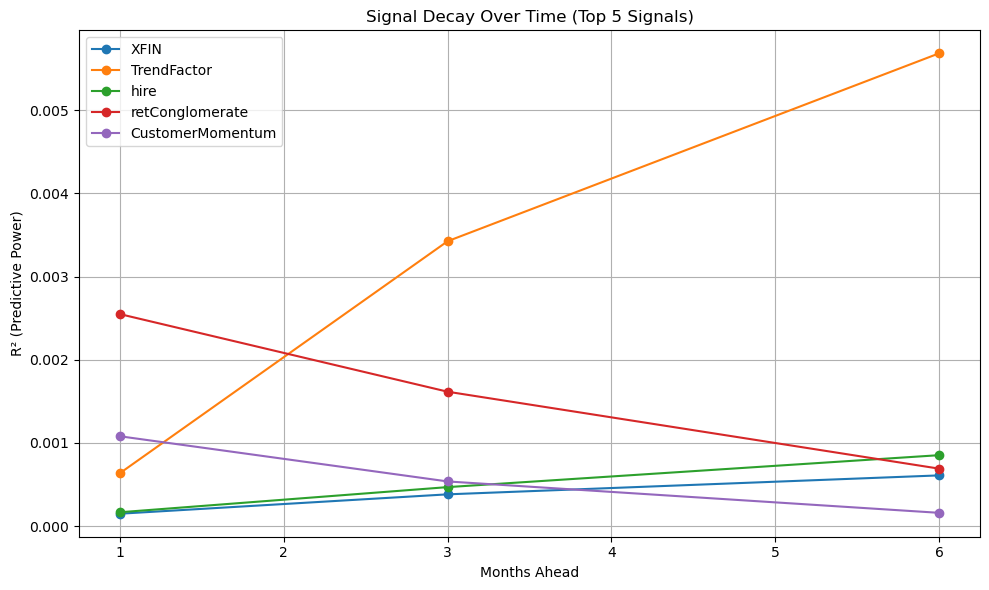

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = merged_df.copy()
df = df.sort_values(['permno', 'date'])

df['ret_1m_fwd'] = df.groupby('permno')['ret'].shift(-1)
df['ret_3m_fwd'] = df.groupby('permno')['ret'].rolling(3, min_periods=1).sum().shift(-3).reset_index(0, drop=True)
df['ret_6m_fwd'] = df.groupby('permno')['ret'].rolling(6, min_periods=1).sum().shift(-6).reset_index(0, drop=True)

signals = [
    'XFIN', 'TrendFactor', 'NetEquityFinance', 'TotalAccruals', 'grcapx',
    'RDS', 'MomOffSeason06YrPlus', 'roaq', 'NetDebtFinance', 'InvGrowth',
    'InvestPPEInv', 'hire', 'DelDRC', 'retConglomerate', 'CustomerMomentum',
    'MomSeason16YrPlus', 'IndMom', 'betaVIX', 'IntanEP', 'DelLTI'
]

results = []

for signal in signals:
    temp = df[[signal, 'ret_1m_fwd', 'ret_3m_fwd', 'ret_6m_fwd']].dropna()
    X = temp[[signal]].values
    y1 = temp['ret_1m_fwd'].values
    y3 = temp['ret_3m_fwd'].values
    y6 = temp['ret_6m_fwd'].values
    model1 = LinearRegression().fit(X, y1)
    model3 = LinearRegression().fit(X, y3)
    model6 = LinearRegression().fit(X, y6)
    r2_1m = model1.score(X, y1)
    r2_3m = model3.score(X, y3)
    r2_6m = model6.score(X, y6)
    results.append({
        'Signal': signal,
        'R2_1m': r2_1m,
        'R2_3m': r2_3m,
        'R2_6m': r2_6m
    })

decay_df = pd.DataFrame(results)
decay_df['avg_r2'] = decay_df[['R2_1m', 'R2_3m', 'R2_6m']].mean(axis=1)

top_n = 5
top_signals = decay_df.sort_values('avg_r2', ascending=False).head(top_n)['Signal'].tolist()

plt.figure(figsize=(10, 6))
for idx, row in decay_df[decay_df['Signal'].isin(top_signals)].iterrows():
    plt.plot([1, 3, 6],
             [row['R2_1m'], row['R2_3m'], row['R2_6m']],
             marker='o', label=row['Signal'])

plt.xlabel('Months Ahead')
plt.ylabel('R² (Predictive Power)')
plt.title(f'Signal Decay Over Time (Top {top_n} Signals)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
